# Multi-Arm Bandit Project 

**Note** When runnning code, make sure cells execute in order, this is due to part A and B using the same global variables 

Analysis included below

In [ ]:
from random import gauss, randint
from math import log, sqrt
from statistics import mean, stdev
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

In [3]:
Q_curr = [{'count': 0, 'estimate':0}, {'count':0, 'estimate':0}]
epsilon = [0.5,0.2,0.1,0]
avg_rewards = [0 for x in range(1001)]
avg_Q = [0,0]

In [4]:
def func1(t): return 1
def func2(t): return pow(0.9,t)
def func3(t): return (1/(1+log(1+t)))
def func4(t): return (1/t)
getAlpha = [(func1, "alpha = 1"), (func2,"alpha = 0.9^t"), (func3, "alpha = 1/(1+ln(1+t))"), (func4,"alpha = 1/t")]


In [5]:
def getReward(action):
    if(action == 1):
        return gauss(5,sqrt(10))
    if(action == 2):
        if(randint(0,1)):
            return gauss(10, sqrt(15))
        else:
            return gauss(4,sqrt(10))
        
    

In [6]:
def setEstimate(a,r,alpha):
    if(a == 1):
        Q_curr[0]['count']+= 1
        Q_curr[0]['estimate'] = Q_curr[0]['estimate'] + alpha(Q_curr[0]['count']) * (r -  Q_curr[0]['estimate'])
        #print('Action 1 estimate: ' + str(Q_curr[0]['estimate']))
    else:
        Q_curr[1]['count']+= 1
        Q_curr[1]['estimate'] = Q_curr[1]['estimate'] + alpha(Q_curr[1]['count']) * (r -  Q_curr[1]['estimate'])
       # print('Action 2 estimate: ' + str(Q_curr[1]['estimate']))
    

In [7]:
#sets average reward for each timestep over all runs, used to make graph
def setAvgReward(r,t, run):
    avg_rewards[t] = avg_rewards[t] + (1/run) * (r - avg_rewards[t])
    #print('run {} avg by timestep {} is {}'.format(run, t, avg_rewards[run]))

In [8]:
def setAvgQ(run):
    avg_Q[0] = avg_Q[0] + (1/run) * (Q_curr[0]['estimate'] - avg_Q[0])
    avg_Q[1] = avg_Q[1] + (1/run) * (Q_curr[1]['estimate'] - avg_Q[1])
    

In [9]:
#gets average accumulated rewards after 100 runs for each timestep
def getAvgAccReward():
    acc_rewards = [0 for x in range(1001)]
    for index,reward in enumerate(avg_rewards):
        if(index == 0):
            continue
        acc_rewards[index] = acc_rewards[index-1] + (1/index)*(avg_rewards[index] - acc_rewards[index-1])
    return acc_rewards

In [10]:
def displayGraph(ax,e):
    return ax.plot([x for x in range(1001)], getAvgAccReward(), label="e = " + str(e))

In [11]:
def getAction(e):
    if(randint(1, 100) < (e*100)):
        #print('selected nongreedy')
        return randint(1,2)
    else:
        maxVal = max(Q_curr[0]['estimate'], Q_curr[1]['estimate'])
        arr = [index for index,item in enumerate(Q_curr) if (item['estimate']==maxVal)]
        if len(arr) > 1:
            print('breaking tie')
            return randint(1,2)
        else:
            return arr[0]+1

In [12]:
#TODO: Store the last reward (step 1000) for each run, then find standard deviaiton

In [20]:
#Consider 

In [68]:
def printQcurr(r,a,t):
    print("@ timestep {} because Q[curr] = {} action {} was choosen with reward {}".format(t,Q_curr, a, r))

In [13]:
# alpha = getAlpha[3]
# fig, ax = plt.subplots(1,1,figsize=(15,4.8))
# avg_rewards = [0 for x in range(1001)] #reset avg_rewards
# avg_Q = [0,0] #reset avg_Q
# e = 0.1

def bandit(alpha, e, fig, ax, df, q_val):
    global Q_curr
    Q_curr = [{'count': 0, 'estimate':q_val}, {'count':0, 'estimate':q_val}]
    global avg_rewards 
    avg_rewards = [0 for x in range(1001)] #reset avg_rewards
    avg_acc_arr = [] #stores list of average accumulated reward for each run                    
    for run in range(1,101):
        Q_curr = list(map(lambda item: item.fromkeys(list(item.keys()),q_val), Q_curr))
        avg_acc_run = 0
        for timestep in range(1,1001):
            if (timestep == 1):
                a = randint(1,2)
            else:
                a = getAction(e)
            r = getReward(a)
            #printQcurr(r,a, timestep)
            setEstimate(a,r,alpha)
            setAvgReward(r,timestep, run)
            avg_acc_run =  avg_acc_run + (1/timestep)*(r-avg_acc_run) #average accumulated reward
        setAvgQ(run) #updates after every run
        avg_acc_arr.append(avg_acc_run) #stores list of average accumulated reward for each run
    return pd.DataFrame({"Epsilon":[e],"Mean of Accumulated Rewards" : [mean(avg_acc_arr)], "Std Dev of Accumulated Rewards" : [stdev(avg_acc_arr)]
               ,"Mean Q(a1)" : [avg_Q[0]],"True Q(a1)": [5],"Mean of Q(a2)" : [avg_Q[1]],"True Q(a2)" : [6.99]})
    



# Part A Data

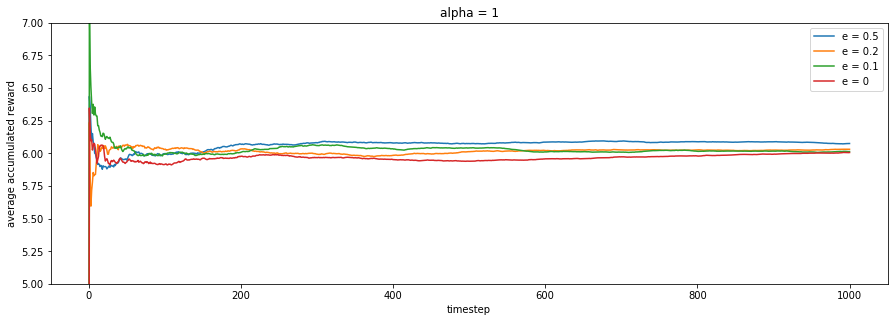

,Epsilon,Mean of Accumulated Rewards,Std Dev of Accumulated Rewards,Mean Q(a1),True Q(a1),Mean of Q(a2),True Q(a2)
0,0.5,6.075344,0.130453,3.911714,5,5.892155,6.99
1,0.2,6.031146,0.141167,3.467888,5,4.386189,6.99
2,0.1,6.013661,0.176610,2.167139,5,3.568264,6.99
3,0.0,6.006270,0.590522,-0.331214,5,1.765702,6.99


'alpha = 1'

displayed df


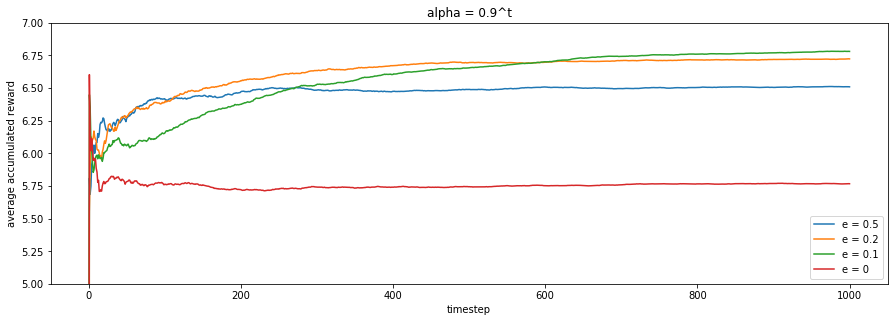

,Epsilon,Mean of Accumulated Rewards,Std Dev of Accumulated Rewards,Mean Q(a1),True Q(a1),Mean of Q(a2),True Q(a2)
0,0.5,6.509802,0.152903,5.050218,5,7.016493,6.99
1,0.2,6.723921,0.305714,4.982385,5,6.986698,6.99
2,0.1,6.781288,0.232625,5.026840,5,6.909715,6.99
3,0.0,5.766895,0.989288,3.074389,5,2.650309,6.99


'alpha = 0.9^t'

displayed df


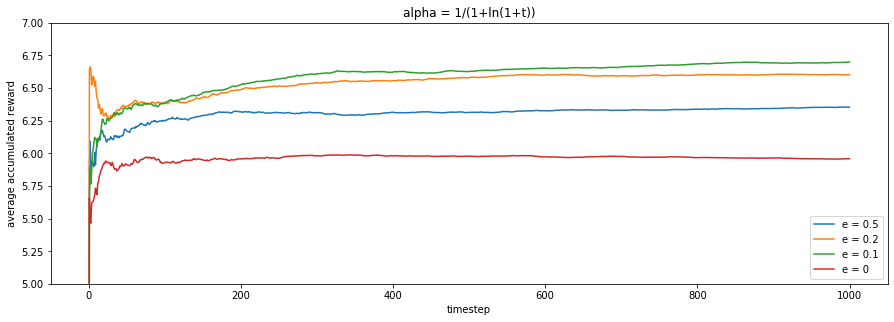

,Epsilon,Mean of Accumulated Rewards,Std Dev of Accumulated Rewards,Mean Q(a1),True Q(a1),Mean of Q(a2),True Q(a2)
0,0.5,6.354169,0.147619,4.724386,5,6.834369,6.99
1,0.2,6.601848,0.187355,4.540178,5,6.679961,6.99
2,0.1,6.700212,0.228909,4.246419,5,6.959835,6.99
3,0.0,5.958699,0.996227,2.496458,5,3.520030,6.99


'alpha = 1/(1+ln(1+t))'

displayed df


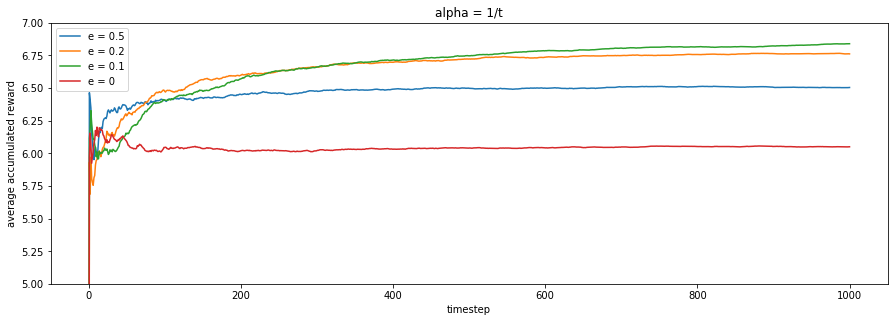

,Epsilon,Mean of Accumulated Rewards,Std Dev of Accumulated Rewards,Mean Q(a1),True Q(a1),Mean of Q(a2),True Q(a2)
0,0.5,6.504716,0.151156,4.991315,5,7.002597,6.99
1,0.2,6.762300,0.167845,5.043541,5,6.985843,6.99
2,0.1,6.840137,0.225524,5.026479,5,7.010738,6.99
3,0.0,6.050323,1.024624,2.275119,5,3.603744,6.99


'alpha = 1/t'

displayed df


In [18]:
def getDataA():
    for alpha in getAlpha:
        
        fig, ax = plt.subplots(1,1,figsize=(15,4.8))
        ax.set_title(label=alpha[1])
        ax.set_xlabel("timestep")
        ax.set_ylabel("average accumulated reward")
        ax.set_ylim(ymin=5, ymax=7.1)
        
        df = pd.DataFrame(columns=["Epsilon","Mean of Accumulated Rewards", "Std Dev of Accumulated Rewards", "Mean Q(a1)", "True Q(a1)",
                      "Mean of Q(a2)", "True Q(a2)"])
        
        for e in epsilon:
            global avg_Q 
            avg_Q = [0,0] #means of action value Q(a1), Q(a2) 
            df = pd.concat([df,bandit(alpha[0], e, fig, ax, df, 0)],  ignore_index=True)
            displayGraph(ax,e)
        
        ax.legend()
        plt.show()
        display(df, alpha[1])
        print('displayed df')
getDataA()
            

# Part A: Analysis 

### Alpha = 1:

Having alpha = 1 means our Q-values are flucuating significanlty over time rather than stabilizing. Resultantly,our Q-values become poor predictors of each action's expected value. This can be seen when looking at the mean of Q(a1) and Q(a2) for any epsilon value. As a result, the decision as to which action to take over time, did not favor the true optimal action, which is corroborated when comparing the mean of accumulated rewards to other alpha values. In terms of the epsilon values, we saw a gradual approach of mean(Q1) and mean(Q2) to their respective expected values as e got larger. This is to be expected because as epsilon increases, sampling between each action increases during a single run. As a result, each Q-value by the end of the run starts to loosely mimics a sample reward in that action's reward distribution. Averaging over all rewards would then yield something close to the expected value. 

### Alpha = 0.9^k

Using an alpha value of 0.9^k significantly altered the effectivness of different epsilons as well as the Q-values as compared to alpha = 1. This is to be expected because a function like 0.9^k behaves simiarly to 1/k, which lowers the weight of rewards at later timesteps. This allowed our q-values to stablize at the expected rewards. So long as enough samples are collected, the agent gets better at consistantly choosing the optimal action. For this reason, epsilon vlaues of 0.1, 0.2 enabled the agent to recieve higher average accumulated rewards. An epsilon value of 0.5 resulted in the agent frequently picking the unoptimal solution despite having accurate Q-values for each action. An epsilon value of 0 resulted in the agent over-exploiting whatever action it intitally selected, which might not have been the optimal action. The result is lower mean accumulated rewards and lower mean Q(a1) and Q(a2) values as each run resulted in one of the two actions having a Q-value of 0. Because 0.9^k asympotically approaches 0 slower than 1/k, I expected the average accumulated awards to approach 7 slower than 1/k. This is because our Q-values flucuated more severely than they would when alpha = 1/k, which can cause the agent to switch its actions toward the begining time steps. This is confirmed when comparing the mean of accumulated rewards and the slopes between the two alpha values.


### Alpha = 1/(1+ln(1+k))

Due to the asympotic behavior of 1/(1+ln(1+k)) our Q-values will flucuate more severly even in later time steps as compared to 0.9^k and 1/k. As a result our agent will be slower to consistantly decide on a single action, resulting in a lower average accumulated reward. This can be seen both visually and numerically in the mean accumulated rewards for every epsilon when compared to 1/t or 0.9^t. Varying the epsilons behaved similarly to the aforementioned alpha value in that too much and too little exploration can lead to either consistantly choosing the unoptimal action or too frequently swaying away from the optimal one. 

### Alpha = 1/k

An Alpha of 1/k means that our Q-values are taking the average of all rewards collected for an action. Behaviorally, 1/k places a high emphasis on early rewards and a lower on later rewards. This means the agent would stabilize on an action early on. As result we expected this agent to have the highest average accumulated reward. This is confirmed on our plot by having the quickest ascent toward 7, which is the mean of action 2. Quantitativly this is confirmed by having the highest average accumulated reward for almost all epsilon values. As for epsilon values, the behavior mimics all other alpha values, which is expected as too much exploration results in deviating away from the optimal action, too little exploration results in the agent consistanly choosing the wrong one roughly half the time.  



/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


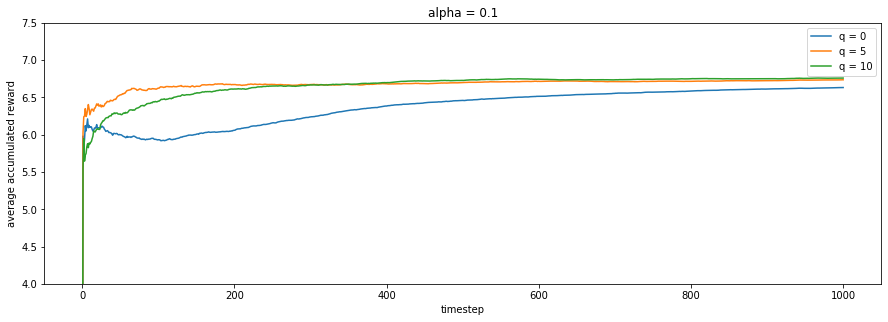

,Epsilon,Mean Q(a1),Mean of Accumulated Rewards,Mean of Q(a2),Optimistic initial Q,Std Dev of Accumulated Rewards,True Q(a1),True Q(a2)
0,0.1,4.561153,6.632555,6.938560,0,0.281697,5,6.99
1,0.1,4.557833,6.736323,6.923155,5,0.175320,5,6.99
2,0.1,4.638531,6.759609,6.926371,10,0.190891,5,6.99


<Figure size 432x288 with 0 Axes>

In [14]:
def getDataB():
    def func(t): return (0.1)
    alpha = (func, "alpha = 0.1")
    e = 0.1
    q_val = [0,5,10]
    fig, ax = plt.subplots(1,1,figsize=(15,4.8))
    ax.set_title(label=alpha[1])
    ax.set_xlabel("timestep")
    ax.set_ylabel("average accumulated reward")
    ax.set_ylim(ymin=4, ymax=7.5)
    df = pd.DataFrame(columns=["Epsilon","Optimistic initial Q","Mean of Accumulated Rewards", "Std Dev of Accumulated Rewards", "Mean Q(a1)", "True Q(a1)",
                      "Mean of Q(a2)", "True Q(a2)"])
    global avg_Q
    #ax.set_ylim(ymin=4, ymax=7.5)
    for index,q in enumerate(q_val):
        avg_Q = [0,0]
        df = pd.concat([df,bandit(alpha[0], e, fig, ax, df, q)],  ignore_index=True)
        df.set_value(index,"Optimistic initial Q", q)
        ax.plot([x for x in range(1001)], getAvgAccReward(), label="q = " + str(q))
        
        
        
    ax.legend()
    plt.show()
    display(df)
    plt.savefig('/Users/vishesh.javangula@ibm.com/Desktop/HW2_b.pdf', bbox_inches='tight')
    
getDataB()
    
    
    

# Part B: Analysis

Due to having an epsilon of 0.1, I expected all instances to approach an average accumulated reward of 7, which is roughly what we see in our graph and in our Mean of Accumulated Reward column. The main differences should be in the rate of approach. Having an optimisiic initial value of 0 means that exploration likely does not occur until  the epsilon value forces a random choice. As a result we expect this experiement to be the slowest out of all three in approaching 7 which can be seen in the data. Due to our reward distributions, having an initial Q-value of 10 would result in a high degree of exploration in the beggining because the probabillity of it lowering after the first action is higher than if we started with an initial value of 5. This high degree of exploration in the beggining stages should result in a faster ascent than q=0 to an average accumulated reward of 7, which is what occured in the data. I expected an optimistic initial value of 5 to perform better than the others because the probability of having the q-values decrease is low. Therefore, the agent is likely to stay with the action that increase the Q-values earlier-on than when intital Q-values are 10. Additionally, even if the agent at first picks the unoptimal action, the Q-values will incentivize the agent to try the other action after only a few iterations. 